# Machine Learning Model

- Pada Notebook ini akan dibangun Supervised Machine Learning menggunakan metode Logisitic Regression, Random Forest, dan K-Nearest Neighbors.
- Class label pada dataset tidak seimbang, label Not Churn : 5163, label Chrun : 1869. 
- Model 1 akan menggunakan dataset asli tanpa menyeimbangkan class terlebih dahulu, model 2 akan menggunakan dataset yang diseimbangkan terlebih dahulu dengan metode Under Sampling, model 3 akan menggunakan dataset yang diseimbangkan dengan metode Over Sampling.
- Feature Monthly Charges dan Total Charges tidak akan digunakan sebagai variable prediktor dengan pertimbangan sebagai berikut :
    - 2 Feature tersebut merupakan feature dependent, hal ini sudah dibuktikan pada notebook EDA sebelumnya
    - Dalam membuat model Machine Learning, tidak ada keharusan untuk membuang feature yang dependent, namun dalam membuat model interface yang bisa digunakan oleh user, 2 feature ini akan menyulitkan user untuk melakukan input nilainya karena user tidak benar-benar tahu nilainya. Untuk mendapatkan nilai Monthly Charges dan Total Charges setiap perusahaan pasti sudah memiliki formula/perhitungan untuk menentukan harga, jika demikian kita bisa menggunakan feature ini sebagai prediktor, tapi pada kasus ini kita tidak memiliki formula tersebut.

- Sebelum saya benar benar membuang feature tersebut, saya akan melihat perbandingan model yang menggunakan 2 feature tersebut dan yang tidak menggunakan 2 feature tersebut.

## Load Package and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score,RandomizedSearchCV, GridSearchCV
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", 22)
telcom = pd.read_csv('telcom_clean1.csv')
telcom.head()

,customerID,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,0,0,0,1,1,1,0,1,1,0,...,0,0,1,0,0,1,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,0,0,0,0,0,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,1,1,1,1,0,1,0,...,0,0,1,0,0,1,0,0,-1.239504,0.196178,-0.940457


In [3]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 43 columns):
customerID                                 7032 non-null object
SeniorCitizen                              7032 non-null int64
Partner                                    7032 non-null int64
Dependents                                 7032 non-null int64
PhoneService                               7032 non-null int64
PaperlessBilling                           7032 non-null int64
Churn                                      7032 non-null int64
gender_Female                              7032 non-null int64
gender_Male                                7032 non-null int64
MultipleLines_No                           7032 non-null int64
MultipleLines_No phone service             7032 non-null int64
MultipleLines_Yes                          7032 non-null int64
InternetService_DSL                        7032 non-null int64
InternetService_Fiber optic                7032 non-null int64
InternetSe

# 1. Model 1 (Imbalance Dataset)

- Pada Model ini saya akan menggunakan semua feature sebagai variable prediktor
- Untuk melakukan prediksi, saya akan menggunakan model klasifikasi Logistic Regression, Random Forest, dan K-Nearest Neighbors.

### Spliting Data

In [4]:
## train test split
pd.set_option("display.max_columns", 33)
#splitting train and test data 
feature    = telcom.drop(columns=['customerID','Churn'])
target = telcom['Churn']
train_X,test_X,train_Y,test_Y = train_test_split(feature,target,test_size = .25,random_state=123)
feature.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'gender_Female', 'gender_Male', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', '

### Deklarasi Model

Deklarasi model menggunakan parameter default

In [5]:
### Logistic Regression
lr = LogisticRegression()
lr.fit(train_X,train_Y)

### Random Forest
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)

### KNN
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)

## SVM
sv = SVC()
sv.fit(train_X,train_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Evaluation

__1. Confusion Matrix__

Pada tahap ini saya akan melihat hasil klasifikasi dalam bentuk Confusion matrix, Confusion matrix adalah tabel yang terdiri dari data aktual dan data prediksi, tabel ini digunakan dengan tujuan untuk
mengukur kinerja suatu model klasifikasi. Berikut ini merupakan tabel klasifikasi churning customer

-|pred "No Churn"|pred "Churn"
---|---|---
__aktual "No Churn"__|__TN__|__FP__
__aktual "Churn"__|__FN__|__TP__

- True Negative (TN) adalah jumlah pelanggan dengan nilai aktual non churn, dan diprediksi non churn.
- False Positive (FP) adalah jumlah pelanggan dengan nilai aktual non churn, tapi diprediksi churn.
- True Positive (TP) adalah jumlah pelanggan dengan nilai aktual churn, dan diprediksi churn.
- False Negative (FN) adalah jumlah pelanggan dengan nilai aktual churn, tapi diprediksi non churn.

__Noted__ : Pada model ini, No Churn dilabeli dengan angka 0, sedangkan Churn dilabeli dengan angka 1

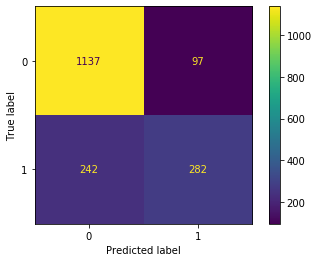

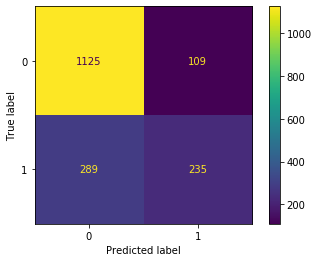

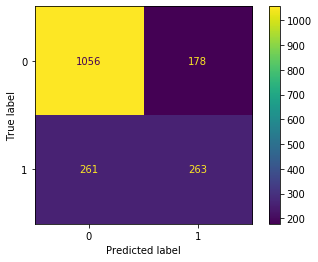

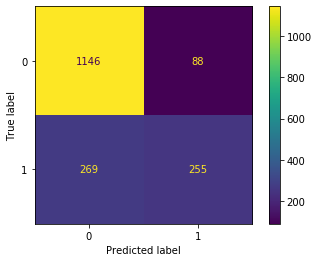

In [6]:
plot_confusion_matrix(lr,test_X,test_Y,values_format='0.0f')
plot_confusion_matrix(rf,test_X,test_Y,values_format='0.0f')
plot_confusion_matrix(knn,test_X,test_Y,values_format='0.0f')
plot_confusion_matrix(sv,test_X,test_Y,values_format='0.0f')

__2. Evaluation Matrix__

Untuk melakukan evaluasi bisa dilakukan dengan menghitung Precision, Recall, F1 Score, dan Accuracy

- _Precision_ dihitung untuk mengevaluasi seberapa baik ketepatan model dapat memprediksi suatu kelas.
Precision didapatkan dengan menghitung perbandingan antara jumlah data untuk satu kelas tertentu
yang diprediksi dengan benar dibagi jumlah total prediksi kelas tersebut.
$$\displaystyle Precision(1) = \frac {TP}{TP + FP}$$
$$\displaystyle Precision(0) = \frac {TN}{TN + FN}$$

- _Recall_ dihitung untuk mengevaluasi seberapa besar coverage suatu model dalam memprediksi suatu
kelas tertentu. Recall didapatkan dengan menghitung perbandingan antara jumlah data untuk satu kelas
tertentu yang diprediksi dengan benar dibagi jumlah total nilai aktual kelas tersebut. Recall positif disebut Sensitivity, untuk Recall Negatif disebut Specify.
    - _Sensitivity_ merupakan frekuensi relatif dari memprediksi suatu kejadian yang terjadi ketika kejadian tersebut memang terjadi
    - _Specify_ merupakan frekuensi relatif dari memprediksi suatu kejadian yang tidak terjadi ketika kejadian tersebut memang tidak terjadi
$$\displaystyle Recall(1)/Sensitivity = \frac {TP}{TP + FN}$$
$$\displaystyle Recall(0)/Specify = \frac {TN}{TN + FP}$$

- _F1 Score_ adalah perhitungan kombinasi antara _recall_ dan _precision_ , bisa dikatakan harmonic / rata-rata tertimbang antara _recall_ dan _precision_
$$\displaystyle F1 Score(1) = 2 \cdot \frac {Recall(1) \cdot Precision(1)}{Recall(1) + Precision(1)}$$

$$\displaystyle F1 Score(0) = 2 \cdot \frac {Recall(0) \cdot Precision(0)}{Recall(0) + Precision(0)}$$

- _Accuracy_ merupakan ukuran seberapa akurat model memprediksi data, dihitung berdasarkan total prediksi benar dibagi total semua prediksi
$$\displaystyle Accuracy = \frac {TP + TN}{TP + TN + FP + FN}$$

In [7]:
print('Logistic Regressin\n',classification_report(test_Y,lr.predict(test_X)))
print('\n\nRandom Forest\n',classification_report(test_Y,rf.predict(test_X)))
print('\n\nKNN\n',classification_report(test_Y,knn.predict(test_X)))
print('\n\nSVM\n',classification_report(test_Y,sv.predict(test_X)))

Logistic Regressin
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1234
           1       0.74      0.54      0.62       524

    accuracy                           0.81      1758
   macro avg       0.78      0.73      0.75      1758
weighted avg       0.80      0.81      0.80      1758



Random Forest
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      1234
           1       0.68      0.45      0.54       524

    accuracy                           0.77      1758
   macro avg       0.74      0.68      0.70      1758
weighted avg       0.76      0.77      0.76      1758



KNN
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      1234
           1       0.60      0.50      0.55       524

    accuracy                           0.75      1758
   macro avg       0.70      0.68      0.69      1758
weighted avg       0.74      0

__3. ROC and AUC__

- __ROC (Receiver Operating Characteristics)__ kurva tentang true positive rate (TPR) vs false positive rate (FPR) sebagai fungsi threshold dari sebuah model untuk mengklasifikasikan kelas positif. 

$$\displaystyle TPR = \frac {TP}{TP+FN}$$

$$\displaystyle FPR = \frac {FP}{TN+FP}$$

- __AUC (Area Under the Curve)__ Matric untuk mengkalkulasi perfoma secara keseluruhan dari model klasifikasi berdasarkan area di bawah kurva ROC, luas maksimal AUC adalah 1, semakin tinggi AUC artinya model semakin baik

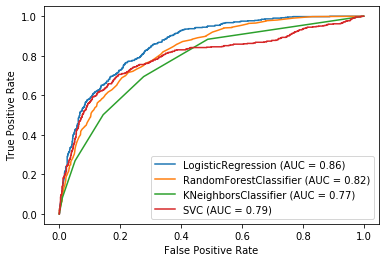

In [8]:
display = plot_roc_curve(lr,test_X,test_Y)
plot_roc_curve(rf,test_X,test_Y,ax=display.ax_)
plot_roc_curve(knn,test_X,test_Y,ax=display.ax_)
plot_roc_curve(sv,test_X,test_Y,ax=display.ax_)

__Noted__ : Dalam evaluasi model ini saya menggunakan data test imbalance, karena model ini dibangun untuk memeprediksi kemungkinan customer untuk churning (class label : 1), selain menggunakan __AUC__ , saya menggunakan __F1 Score__ untuk class label : 1  dan __Recall(1) / Sensitivity__ sebagai acuan utama mengukur peforma model.

Dari data report di atas, __Logistic Regression__ merupakan model terbaik dengan Sensitivity, F1 Score, dan AUC tertingi

### Hyperparameter Tuning 

Hyperparameter Tuning bertujuan untuk menentukan parameter terbaik dari setiap model sehingga peforma model bisa ditingkatkan, saya akan menggunakan ```GridSearchCV``` untuk melakukan parameter tuning. GridSearchCV memungkinkan untuk mengkombinasikan setiap parameter yang telah kita deklarasikan.

Pada proses hyper parameter ini saya mengunakan ```CrossValidation``` dengan 5 fold/lipatan. Karena menggunakan class imbalance, pada hyperparameter saya menggunakan scoring __F1__

__Parameter Tuning Logistic Regression__

In [9]:
def tuning(model,parameter,n_cv):
    random = GridSearchCV(model, parameter, cv = n_cv,scoring='f1')
    random.fit(train_X,train_Y)
    best_param = random.best_params_
    
    return best_param

In [10]:
# lr_tune = LogisticRegression()
# weights = np.linspace(0.05, 0.95, 20)
# param_lr = {
#     'solver':['newton-cg','lbfgs','liblinear','sag','saga'], ##algoritma Logistic regression
#     'penalty':['none','l1','l2','elasticnet','none'], # regularisasi
#     'class_weight': [{0: x, 1: 1.0-x} for x in weights]  # bobot masing2 class      
# }

# param_best = tuning(lr_tune,param_lr,5)
# param_best

# {'class_weight': {0: 0.33421052631578946, 1: 0.6657894736842105},
#  'penalty': 'l1',
#  'solver': 'saga'}

In [11]:
lr_tune = LogisticRegression(penalty='l1',solver='saga',class_weight= {0: 0.33421052631578946, 1: 0.6657894736842105})
lr_tune.fit(train_X,train_Y)

LogisticRegression(C=1.0,
                   class_weight={0: 0.33421052631578946, 1: 0.6657894736842105},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='l1', random_state=None, solver='saga', tol=0.0001,
                   verbose=0, warm_start=False)

__Parameter Tuning Random Forest__

In [14]:
# rf_tune = RandomForestClassifier()
# weights = np.linspace(0.05, 0.95, 20)
# param_rf= {
#     'n_estimators': [10,50,100], ## jumlah tree
#     'criterion':['gini','entropy'], ## algoritma tree
#     'bootstrap':[False,True], ## baging or bootstraping
#     'class_weight': [{0: x, 1: 1.0-x} for x in weights] 
# }

# param_best = tuning(rf_tune,param_rf,5)
# param_best

In [15]:
rf_tune = RandomForestClassifier(n_estimators = 100,criterion='entropy',bootstrap=True,class_weight={0: 0.09736842105263158, 1: 0.9026315789473685})
rf_tune.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.09736842105263158,
                                     1: 0.9026315789473685},
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

__Parameter Tuning KNN__

In [16]:
# knn_tune = KNeighborsClassifier()

# param_knn = {
#         'n_neighbors' : list(range(50,100)), ## jumlah n neighbors
#         'weights':['uniform','distance'], ## one man one vote , lebih dekat lebih berbobot
#         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], # struktur data
# }

# param_best = tuning(knn_tune,param_knn,5)
# param_best

# {'algorithm':'auto','n_neighbors':64,'weights' : 'uniform'}

In [17]:
knn_tune = KNeighborsClassifier(algorithm='auto',n_neighbors=64,weights='uniform')
knn_tune.fit(train_X,train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=64, p=2,
                     weights='uniform')

__SVM__

In [ ]:
sv_tune = SVC()
weights = np.linspace(0.05, 0.95, 20)
param = { 
        'kernel':['linear','sigmoid'],
        'class_weight': [{0: x, 1: 1.0-x} for x in weights] ,
       'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

param_best = tuning(sv_tune,param,5)
param_best

In [17]:
sv_tune = SVC()
sv_tune.fit(train_X,train_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
print('\nXGB Default\n',classification_report(test_Y,gb.predict(test_X)))
print('\nXGB Tuning\n',classification_report(test_Y,gb_tune.predict(test_X)))


XGB Default
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1234
           1       0.70      0.53      0.60       524

    accuracy                           0.79      1758
   macro avg       0.76      0.72      0.73      1758
weighted avg       0.78      0.79      0.78      1758


XGB Tuning
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1234
           1       0.73      0.52      0.61       524

    accuracy                           0.80      1758
   macro avg       0.77      0.72      0.74      1758
weighted avg       0.79      0.80      0.79      1758



### Final Evaluation

Logistic Regression Default
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1234
           1       0.74      0.54      0.62       524

    accuracy                           0.81      1758
   macro avg       0.78      0.73      0.75      1758
weighted avg       0.80      0.81      0.80      1758



Logistic Regression Tuning
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1234
           1       0.62      0.71      0.66       524

    accuracy                           0.78      1758
   macro avg       0.74      0.76      0.75      1758
weighted avg       0.79      0.78      0.79      1758


Random Forest Default
               precision    recall  f1-score   support

           0       0.80      0.92      0.85      1234
           1       0.70      0.45      0.55       524

    accuracy                           0.78      1758
   macro avg       0.75      0.68      0.70  

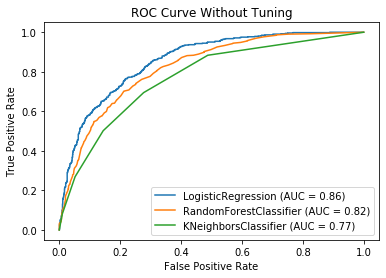

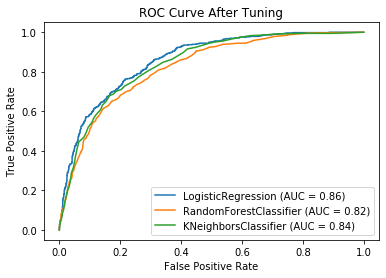

In [20]:
def eva_matrix(lr,lr_tune,rf,rf_tune,knn,knn_tune,test_X,test_Y):
    ## Report
    print('Logistic Regression Default\n',classification_report(test_Y,lr.predict(test_X)))
    print('\n\nLogistic Regression Tuning\n',classification_report(test_Y,lr_tune.predict(test_X)))
    print('========================================================================')
    print('\nRandom Forest Default\n',classification_report(test_Y,rf.predict(test_X)))
    print('\nRandom Forest Tuning\n',classification_report(test_Y,rf_tune.predict(test_X)))
    print('========================================================================')
    print('\nKNN Default\n',classification_report(test_Y,knn.predict(test_X)))
    print('\nKNN Tuning\n',classification_report(test_Y,knn_tune.predict(test_X)))

    ## ROC_AUC
    display = plot_roc_curve(lr,test_X,test_Y)
    plot_roc_curve(rf,test_X,test_Y,ax=display.ax_)
    plot_roc_curve(knn,test_X,test_Y,ax=display.ax_)
    plt.title('ROC Curve Without Tuning')

    disp = plot_roc_curve(lr_tune,test_X,test_Y)
    plot_roc_curve(rf_tune,test_X,test_Y,ax=disp.ax_)
    plot_roc_curve(knn_tune,test_X,test_Y,ax=disp.ax_)
    plt.title('ROC Curve After Tuning')

eva_matrix(lr,lr_tune,rf,rf_tune,knn,knn_tune,test_X,test_Y)

In [133]:
def df_report(lr,lr_tune,rf,rf_tune,knn,knn_tune,test_X,test_Y):
    ## ROC-AUC
    a = roc_auc_score(test_Y, lr.predict_proba(test_X)[:,1])
    b = roc_auc_score(test_Y, lr_tune.predict_proba(test_X)[:,1])
    c = roc_auc_score(test_Y, rf.predict_proba(test_X)[:,1])
    d = roc_auc_score(test_Y, rf_tune.predict_proba(test_X)[:,1])
    e = roc_auc_score(test_Y, knn.predict_proba(test_X)[:,1])
    f = roc_auc_score(test_Y, knn_tune.predict_proba(test_X)[:,1])

    ## Accuracy
    g = classification_report(test_Y,lr.predict(test_X),output_dict=True)['accuracy']
    h = classification_report(test_Y,lr_tune.predict(test_X),output_dict=True)['accuracy']
    i = classification_report(test_Y,rf.predict(test_X),output_dict=True)['accuracy']
    j = classification_report(test_Y,rf_tune.predict(test_X),output_dict=True)['accuracy']
    k = classification_report(test_Y,knn.predict(test_X),output_dict=True)['accuracy']
    l = classification_report(test_Y,knn_tune.predict(test_X),output_dict=True)['accuracy']

    ## Precision,Recall,F1
    m = classification_report(test_Y,lr.predict(test_X),output_dict=True)['1']
    n = classification_report(test_Y,lr_tune.predict(test_X),output_dict=True)['1']
    o = classification_report(test_Y,rf.predict(test_X),output_dict=True)['1']
    p = classification_report(test_Y,rf_tune.predict(test_X),output_dict=True)['1']
    q = classification_report(test_Y,knn.predict(test_X),output_dict=True)['1']
    r = classification_report(test_Y,knn_tune.predict(test_X),output_dict=True)['1']

    auc = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression Tune','Random Forest','Random Forest Tune',
                               'KNN','KNN Tune'],
                          'AUC':[a,b,c,d,e,f],
                          'Accuracy':[g,h,i,j,k,l]})
    precision = pd.DataFrame([m,n,o,p,q,r])
    precision.drop(columns='support',inplace=True)
    df = pd.concat([auc,precision],axis=1)
    return df

report0 = df_report(lr,lr_tune,rf,rf_tune,knn,knn_tune,test_X,test_Y)
report0

,Model,AUC,Accuracy,precision,recall,f1-score
0,Logistic Regression,0.858847,0.807167,0.744063,0.538168,0.624585
1,Logistic Regression Tune,0.858654,0.782139,0.616529,0.711832,0.660762
2,Random Forest,0.822824,0.774744,0.683908,0.454198,0.545872
3,Random Forest Tune,0.823320,0.776451,0.688761,0.456107,0.548794
4,KNN,0.771484,0.750284,0.596372,0.501908,0.545078
5,KNN Tune,0.842080,0.788965,0.683453,0.543893,0.605739


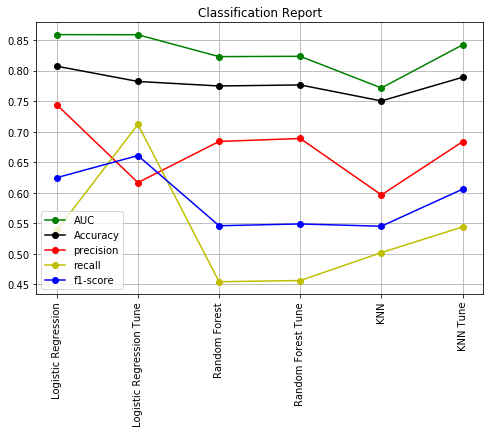

In [134]:
def plot_report(report):
    plt.figure(figsize=(8,5))
    plt.plot(report['Model'], report['AUC'],'g-o',label='AUC')
    plt.plot(report['Model'], report['Accuracy'],'k-o',label='Accuracy')
    plt.plot(report['Model'], report['precision'],'r-o',label='precision')
    plt.plot(report['Model'], report['recall'],'y-o',label='recall')
    plt.plot(report['Model'], report['f1-score'],'b-o',label='f1-score')
    plt.xticks(rotation=90);plt.title('Classification Report')
    plt.grid(True)
    plt.legend()
    plt.show()
    
plot_report(report0)

- Seteleh dilakukan hyperparameter tuning, semua model mengalami peningkatan peforma, __Logistic Regression Tune__ merupakan model terbaik dengan __F1 Score__ dan __AUC__ tertinggi

## Exclude Feature Monthly Charges dan Total Charges

Pada Model ini saya tidak akan menggunakan Monthly Charges dan Total Charges untuk memprediksi model. Kemudian saya akan membandingkan dengan model sebelumnya yang menggunakan feature MonthlyCharges dan Total Charges

### Spliting Data

In [21]:
#splitting train and test data 
train_X1 = train_X.drop(columns=['MonthlyCharges','TotalCharges'])
test_X1 = test_X.drop(columns=['MonthlyCharges','TotalCharges'])
train_Y1 = train_Y.copy()
test_Y1 = test_Y.copy()

### Deklarasi Model

Deklarasi model menggunakan parameter default

In [19]:
### Logistic Regression
lr1 = LogisticRegression()
lr1.fit(train_X1,train_Y1)

rf1 = RandomForestClassifier()
rf1.fit(train_X1,train_Y1)

knn1 = KNeighborsClassifier()
knn1.fit(train_X1,train_Y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Hyper Parameter Tuning

__Logistic Regression__

In [20]:
def tuning(model,parameter,n_cv):
    random = GridSearchCV(model, parameter, cv = n_cv,scoring='f1')
    random.fit(train_X1,train_Y1)
    best_param = random.best_params_
    
    return best_param

In [21]:
# lr1_tune = LogisticRegression()
# weights = np.linspace(0.05, 0.95, 20)
# param_lr = {
#     'solver':['newton-cg','lbfgs','liblinear','sag','saga'], ##algoritma Logistic regression
#     'penalty':['none','l1','l2','elasticnet','none'], # regularisasi
#     'class_weight': [{0: x, 1: 1.0-x} for x in weights]        
# }

# param_best = tuning(lr1_tune,param_lr,5)
# param_best

# {'class_weight': {0: 0.33421052631578946, 1: 0.6657894736842105},
#  'penalty': 'l1',
#  'solver': 'saga'}

In [22]:
lr1_tune = LogisticRegression(solver='saga',penalty='l1',class_weight={0: 0.33421052631578946, 1: 0.6657894736842105})
lr1_tune.fit(train_X1,train_Y1)

LogisticRegression(C=1.0,
                   class_weight={0: 0.33421052631578946, 1: 0.6657894736842105},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='l1', random_state=None, solver='saga', tol=0.0001,
                   verbose=0, warm_start=False)

__Random Forest__

In [23]:
# rf1_tune = RandomForestClassifier()
# weights = np.linspace(0.05, 0.95, 20)
# param_rf= {
#     'n_estimators': [10,50,100], ## jumlah tree
#     'criterion':['gini','entropy'], ## algoritma tree
#     'bootstrap':[False,True], ## baging or bootstraping
#     'class_weight': [{0: x, 1: 1.0-x} for x in weights] 
# }

# param_best = tuning(rf1_tune,param_rf,5)
# param_best

# {'bootstrap': False,
#  'class_weight': {0: 0.09736842105263158, 1: 0.9026315789473685},
#  'criterion': 'entropy',
#  'n_estimators': 10}

In [24]:
rf1_tune = RandomForestClassifier(n_estimators = 10,criterion='entropy',bootstrap=False,
                                 class_weight={0: 0.09736842105263158, 1: 0.9026315789473685})
rf1_tune.fit(train_X1,train_Y1)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight={0: 0.09736842105263158,
                                     1: 0.9026315789473685},
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

__KNN__

In [25]:
# knn1_tune = KNeighborsClassifier()
# param_best = tuning(knn1_tune,param_knn,5)
# param_best

# {'algorithm': 'auto', 'n_neighbors': 79, 'weights': 'uniform'}

In [26]:
knn1_tune = KNeighborsClassifier(weights='distance',n_neighbors=50,algorithm='auto')
knn1_tune.fit(train_X1,train_Y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='distance')

### Evaluation

Logistic Regression Default
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1234
           1       0.74      0.54      0.63       524

    accuracy                           0.81      1758
   macro avg       0.78      0.73      0.75      1758
weighted avg       0.80      0.81      0.80      1758



Logistic Regression Tuning
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1234
           1       0.62      0.70      0.66       524

    accuracy                           0.78      1758
   macro avg       0.74      0.76      0.75      1758
weighted avg       0.79      0.78      0.79      1758


Random Forest Default
               precision    recall  f1-score   support

           0       0.79      0.90      0.84      1234
           1       0.64      0.43      0.51       524

    accuracy                           0.76      1758
   macro avg       0.71      0.66      0.68  

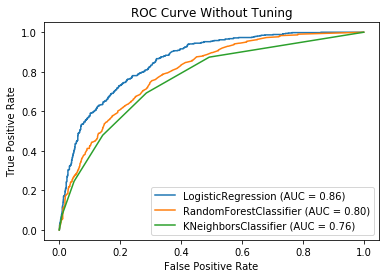

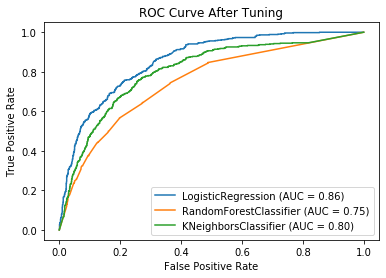

In [144]:
eva_matrix(lr1,lr1_tune,rf1,rf1_tune,knn1,knn1_tune,test_X1,test_Y1)

In [135]:
report1 = df_report(lr1,lr1_tune,rf1,rf1_tune,knn1,knn1_tune,test_X1,test_Y1)
report1

,Model,AUC,Accuracy,precision,recall,f1-score
0,Logistic Regression,0.856781,0.807736,0.742188,0.543893,0.627753
1,Logistic Regression Tune,0.857002,0.782708,0.620748,0.696565,0.656475
2,Random Forest,0.797349,0.758248,0.642651,0.425573,0.512055
3,Random Forest Tune,0.748445,0.744596,0.595908,0.444656,0.509290
4,KNN,0.762049,0.744596,0.587822,0.479008,0.527865
5,KNN Tune,0.802554,0.772469,0.647619,0.519084,0.576271


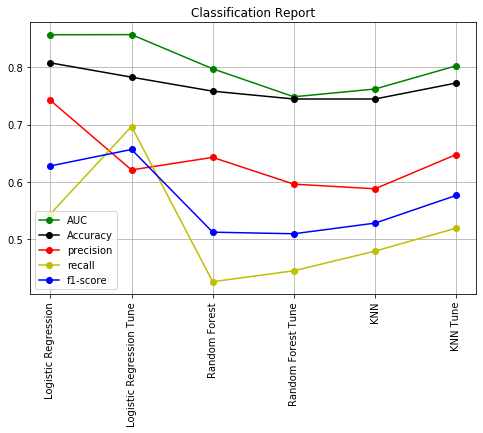

In [136]:
plot_report(report1)

- Berdasarkan grafik di atas, Hyper parameter tuning mampu menaikan __Recall__ dan __F1 Score__ , ini sesuai dengan yang diharapkan karena kita ingin menurunkan False Negatif. Sehingga lebih baik untuk mengklasifikasi label 1 (Churn)
- Model __Logistic Regression Tune__ merupakan model terbaik dengan Recall, F1 Score, dan AUC tertinggi.

### Perbandingan model dengan Feature Monthly Charges dan Total Charges

Pada tahap ini saya ingin melihat apakah dengan membuang feature Monthly Charges dan Total Charges bisa mempengaruhi model atau tidak, saya menggunakan model terbaik sebagai perbandingan

Logistic Regression 1
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1234
           1       0.62      0.71      0.66       524

    accuracy                           0.78      1758
   macro avg       0.74      0.76      0.75      1758
weighted avg       0.79      0.78      0.79      1758

Logistic Regression 2
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1234
           1       0.62      0.70      0.66       524

    accuracy                           0.78      1758
   macro avg       0.74      0.76      0.75      1758
weighted avg       0.79      0.78      0.79      1758



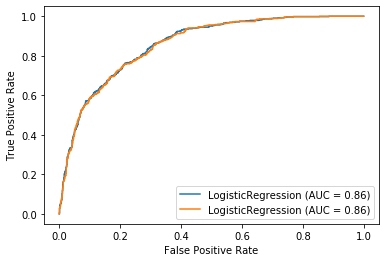

In [30]:
print('Logistic Regression 1\n',classification_report(test_Y,lr_tune.predict(test_X)))
print('Logistic Regression 2\n',classification_report(test_Y1,lr1_tune.predict(test_X1)))

## ROC_AUC
disp = plot_roc_curve(lr_tune,test_X,test_Y)
plot_roc_curve(lr1_tune,test_X1,test_Y1,ax=disp.ax_)

Berdasarkan report klassikasi dan grafik ROC-AUC diatas, dapat disimpulkan bahwa membuang feature Monthly Charges dan Total Charges tidak mempngaruhi model.

# 2. Model 2 (Under Sampling)

Dalam dataset ini __class 0__ : 5163, sedangkan __class 1__ : 1869, saya akan menggunakan ```NearMiss``` untuk menyeimbangkan class, teknik ini akan menghapus beberapa sample majority class yaitu __class 0__ sehingga jumlahnya sama dengan minority __class 1__ , ```NearMiss``` akan menghapus majority class yang memiliki jarak terdekat dari minority class.[source](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/)

### Balancing Dataset 

In [31]:
telcom['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [22]:
X = telcom.drop(columns=['customerID','Churn','MonthlyCharges','TotalCharges'])
Y = telcom['Churn']

In [23]:
nm =  NearMiss()
X_res,Y_res=nm.fit_sample(X,Y)
telco = pd.concat([X_res,Y_res],axis=1)
telco['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

### Spliting Data

In [24]:
#splitting train and test data 
feature    = telco.drop(columns=['Churn'])
target = telco['Churn']
train_X2,test_X2,train_Y2,test_Y2 = train_test_split(feature,target,test_size = .25,random_state=123)

### Deklarasi Model

Deklarasi model menggunakan parameter default

In [35]:
### Logistic Regression
lr2 = LogisticRegression()
lr2.fit(train_X2,train_Y2)
### Random Forest
rf2 = RandomForestClassifier()
rf2.fit(train_X2,train_Y2)
### KNN
knn2 = KNeighborsClassifier()
knn2.fit(train_X2,train_Y2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Hyperparameter Tuning

Sedikit berbeda dengan sebelumnya, karena pada model ini saya menggunakan dataset balance, scoring yang digunakan adalah Accuracy

In [36]:
def tuning(model,parameter,n_cv):
    random = GridSearchCV(model, parameter, cv = n_cv, scoring='accuracy')
    random.fit(train_X2,train_Y2)
    best_param = random.best_params_
    
    return best_param

__Parameter Tuning Logistic Regression__

In [37]:
# lr2_tune = LogisticRegression()
# weights = np.linspace(0.05, 0.95, 20)
# param_lr = {
#     'solver':['newton-cg','lbfgs','liblinear','sag','saga'], ##algoritma Logistic regression
#     'penalty':['none','l1','l2','elasticnet','none'], # regularisasi
# }

# param_best = tuning(lr2_tune,param_lr,5)
# param_best

In [38]:
lr2_tune = LogisticRegression(penalty='l1',solver='liblinear')
lr2_tune.fit(train_X2,train_Y2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

__Parameter Tuning Random Forest__

In [39]:
# rf2_tune = RandomForestClassifier()
# param_rf= {
#     'n_estimators': [10,50,100], ## jumlah tree
#     'criterion':['gini','entropy'], ## algoritma tree
#     'bootstrap':[False,True], ## baging or bootstraping
# }
# param_best = tuning(rf2_tune,param_rf,5)
# param_best

# {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 50}

In [40]:
rf2_tune = RandomForestClassifier(n_estimators = 50,bootstrap=True,criterion='gini')
rf2_tune.fit(train_X2,train_Y2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

__Parameter Tuning KNN__

In [41]:
# knn2_tune = KNeighborsClassifier()
# param_knn = {
#         'n_neighbors' : list(range(50,100)), ## jumlah n neighbors
#         'weights':['uniform','distance'], ## one man one vote , lebih dekat lebih berbobot
#         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], # struktur data
# }

# param_best = tuning(knn2_tune,param_knn,5)
# param_best

# {'algorithm': 'auto', 'n_neighbors': 75, 'weights': 'uniform'}

In [42]:
knn2_tune = KNeighborsClassifier(algorithm='auto',n_neighbors=75,weights='uniform')
knn2_tune.fit(train_X2,train_Y2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=75, p=2,
                     weights='uniform')

### Evaluation

Logistic Regression Default
               precision    recall  f1-score   support

           0       0.74      0.55      0.63       479
           1       0.63      0.80      0.70       456

    accuracy                           0.67       935
   macro avg       0.68      0.67      0.67       935
weighted avg       0.68      0.67      0.66       935



Logistic Regression Tuning
               precision    recall  f1-score   support

           0       0.74      0.54      0.63       479
           1       0.62      0.80      0.70       456

    accuracy                           0.67       935
   macro avg       0.68      0.67      0.66       935
weighted avg       0.68      0.67      0.66       935


Random Forest Default
               precision    recall  f1-score   support

           0       0.66      0.61      0.63       479
           1       0.62      0.67      0.64       456

    accuracy                           0.64       935
   macro avg       0.64      0.64      0.64  

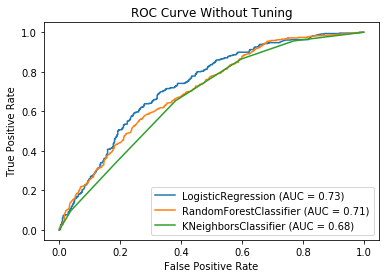

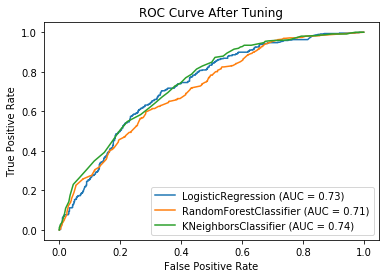

In [145]:
eva_matrix(lr2,lr2_tune,rf2,rf2_tune,knn2,knn2_tune,test_X2,test_Y2)

In [137]:
report2 = df_report(lr2,lr2_tune,rf2,rf2_tune,knn2,knn2_tune,test_X2,test_Y2)
report2

,Model,AUC,Accuracy,precision,recall,f1-score
0,Logistic Regression,0.731669,0.669519,0.626506,0.798246,0.702025
1,Logistic Regression Tune,0.731202,0.667380,0.624357,0.798246,0.700674
2,Random Forest,0.706738,0.637433,0.618182,0.671053,0.643533
3,Random Forest Tune,0.710096,0.633155,0.614604,0.664474,0.638567
4,KNN,0.677098,0.635294,0.619543,0.653509,0.636073
5,KNN Tune,0.744920,0.674866,0.638182,0.769737,0.697813


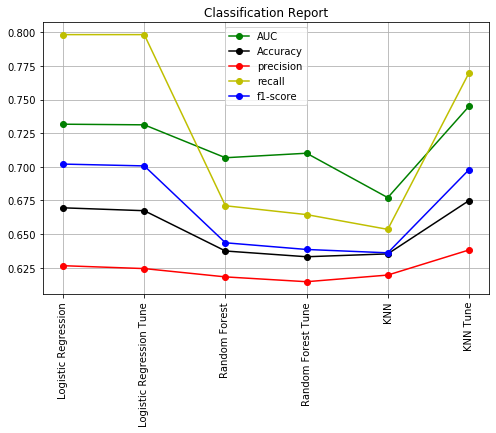

In [138]:
plot_report(report2)

- Hyper parameter tuning tidak berpengaruh pada model Logistic Regression, model Random Forest justru peformanya lebih buruk setelah melakukan prameter tuning, untuk model KNN peforma lebih baik setelah parameter tuning.
- Berdasarkan grafik di atas, model __KNN Tune__ merupakan model terbaik karena memiliki Accuracy dan AUC tertinggi.

# 3. Model 3 (Random Over Sampling)

Pada Model 3 ini saya akan menggunakan ```RandomOverSampler``` untuk menyeimbangkan class, teknik ini akan menduplikasi minority class (__class 1__) sehingga total __class 1__ akan sama dengan majority class  (__class 0__)

### Balancing Dataset 

In [25]:
telcom['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Berbeda dengan Under Sample, saya hanya akan melakukan Over Sample pada data train saja, sehingga data test yang dipakai tidak bias. Untuk itu saya akan melakukan spliting dataset terlebih dahulu, saya akan menggunakan data split pada model 1, sehingga bisa menggunakan data test yang sama

In [26]:
trainX = train_X1.copy()
trainY = train_Y1.copy()
test_X3 = test_X1
test_Y3 = test_Y1
print(len(trainX),len(test_X3))
print(trainY.value_counts())

5274 1758
0    3929
1    1345
Name: Churn, dtype: int64


In [27]:
os =  RandomOverSampler(random_state=123)
train_X3,train_Y3=os.fit_sample(trainX,trainY)
print(len(train_X3),len(train_Y3))
train_Y3.value_counts()

7858 7858


1    3929
0    3929
Name: Churn, dtype: int64

### Deklarasi Model

Deklarasi model menggunakan parameter default

In [28]:
### Logistic Regression
lr3 = LogisticRegression()
lr3.fit(train_X3,train_Y3)
## Random Forest
rf3 = RandomForestClassifier()
rf3.fit(train_X3,train_Y3)
## KNN
knn3 = KNeighborsClassifier()
knn3.fit(train_X3,train_Y3)

## XGB
gb3 = xgb.XGBClassifier()
gb3.fit(train_X3,train_Y3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
print('\n\nXGB\n',classification_report(test_Y3,gb3.predict(test_X3)))



XGB
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1234
           1       0.59      0.62      0.61       524

    accuracy                           0.76      1758
   macro avg       0.71      0.72      0.72      1758
weighted avg       0.76      0.76      0.76      1758



### Hyperparameter Tuning

__Parameter Tuning Logistic Regression__

In [77]:
def tuning(model,parameter,n_cv):
    random = GridSearchCV(model, parameter, cv = n_cv,scoring='accuracy')
    random.fit(train_X3,train_Y3)
    best_param = random.best_params_
    
    return best_param

In [78]:
# lr3_tune = LogisticRegression()
# param_lr = {
#     'solver':['newton-cg','lbfgs','liblinear','sag','saga'], ##algoritma Logistic regression
#     'penalty':['none','l1','l2','elasticnet','none'], # regularisasi        
# }

# param_best = tuning(lr3_tune,param_lr,5)
# param_best

# {'penalty': 'l1', 'solver': 'saga'}

In [79]:
lr3_tune = LogisticRegression(solver='saga',penalty='l1')
lr3_tune.fit(train_X3,train_Y3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

__Parameter Tuning Random Forest__

In [80]:
# rf3_tune = RandomForestClassifier()
# param_rf= {
#     'n_estimators': [10,50,100], ## jumlah tree
#     'criterion':['gini','entropy'], ## algoritma tree
#     'bootstrap':[False,True], ## baging or bootstraping
# }
# param_best = tuning(rf3_tune,param_rf,5)
# param_best

In [81]:
rf3_tune = RandomForestClassifier(n_estimators = 10,criterion='gini',bootstrap=False)
rf3_tune.fit(train_X3,train_Y3)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

__Parameter Tuning KNN__

In [82]:
# knn3_tune = KNeighborsClassifier()
# param_knn = {
#         'n_neighbors' : list(range(50,100)), ## jumlah n neighbors
#         'weights':['uniform','distance'], ## one man one vote , lebih dekat lebih berbobot
#         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], # struktur data
# }

# param_best = tuning(knn3_tune,param_knn,5)
# param_best

In [83]:
knn3_tune = KNeighborsClassifier(weights='distance',n_neighbors=50,algorithm='auto')
knn3_tune.fit(train_X3,train_Y3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='distance')

### Final Evaluation

Logistic Regression Default
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1234
           1       0.56      0.79      0.66       524

    accuracy                           0.75      1758
   macro avg       0.73      0.76      0.73      1758
weighted avg       0.79      0.75      0.76      1758



Logistic Regression Tuning
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1234
           1       0.57      0.79      0.66       524

    accuracy                           0.76      1758
   macro avg       0.73      0.76      0.73      1758
weighted avg       0.79      0.76      0.76      1758


Random Forest Default
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1234
           1       0.59      0.52      0.55       524

    accuracy                           0.75      1758
   macro avg       0.70      0.68      0.69  

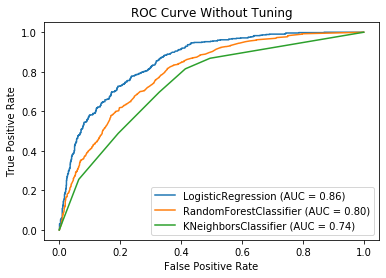

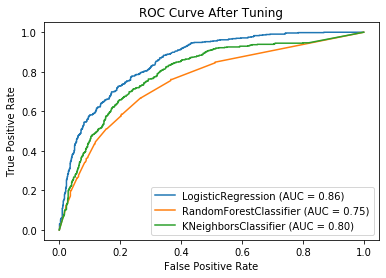

In [147]:
eva_matrix(lr3,lr3_tune,rf3,rf3_tune,knn3,knn3_tune,test_X3,test_Y3)

In [139]:
report3 = df_report(lr3,lr3_tune,rf3,rf3_tune,knn3,knn3_tune,test_X3,test_Y3)
report3

,Model,AUC,Accuracy,precision,recall,f1-score
0,Logistic Regression,0.855692,0.754835,0.563611,0.786260,0.656574
1,Logistic Regression Tune,0.855737,0.755973,0.565158,0.786260,0.657622
2,Random Forest,0.797409,0.750853,0.594298,0.517176,0.553061
3,Random Forest Tune,0.751639,0.751422,0.614776,0.444656,0.516058
4,KNN,0.740889,0.679181,0.474026,0.696565,0.564142
5,KNN Tune,0.796167,0.709329,0.507975,0.790076,0.618372


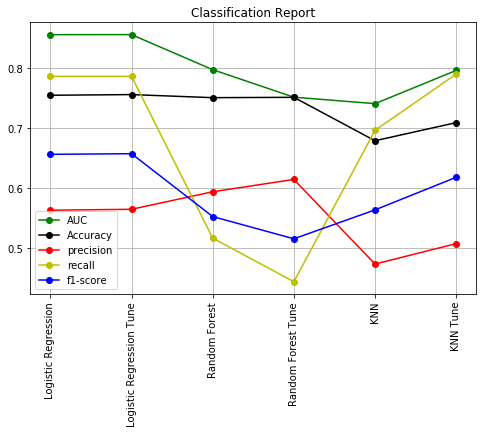

In [140]:
plot_report(report3)

- Hyper parameter tuning tidak berpengaruh pada model Logistic Regression, model Random Forest justru peformanya lebih buruk setelah melakukan prameter tuning, untuk model KNN peforma lebih baik setelah parameter tuning.
- Berdasarkan grafik di atas, model __Logistic Regression__ merupakan model terbaik dengan Recall, F1 Score, dan AUC tertinggi

# Best Model

Saya akan memilih model terbaik dengan membandingkan model terbaik dari tiap perlakuan dataset yang berbeda.

1. Model terbaik yang ditraining dengan dataset imbalance adalah Logistic Regression setelah tuning parameter.
2. Model terbaik yang ditraining dengan balance dataset under sample adalah KNN setelah tuning parameter.
3. Model terbaik yang ditraining dengan balance dataset Over Sample adalah Logistic Regression setelah tuning parameter.

In [87]:
## ROC-AUC
a = roc_auc_score(test_Y1, lr1_tune.predict_proba(test_X1)[:,1])
b = roc_auc_score(test_Y2, knn2_tune.predict_proba(test_X2)[:,1])
c = roc_auc_score(test_Y3, lr3_tune.predict_proba(test_X3)[:,1])

## Accuracy

d = classification_report(test_Y1,lr1_tune.predict(test_X1),output_dict=True)['accuracy']
e = classification_report(test_Y2,knn2_tune.predict(test_X2),output_dict=True)['accuracy']
f = classification_report(test_Y3,lr3_tune.predict(test_X3),output_dict=True)['accuracy']

## Precision,Recall,F1

g = classification_report(test_Y1,lr1_tune.predict(test_X1),output_dict=True)['1']
h = classification_report(test_Y2,knn2_tune.predict(test_X2),output_dict=True)['1']
i = classification_report(test_Y3,lr3_tune.predict(test_X3),output_dict=True)['1']

model = pd.DataFrame({'Model':['Logistic Regression1','KNN2','Logistic Regression3'],
                      'AUC':[a,b,c],
                      'Accuracy':[d,e,f]})
report = pd.DataFrame([g,h,i])
report.drop(columns='support',inplace=True)
report4 = pd.concat([model,report],axis=1)
report4

,Model,AUC,Accuracy,precision,recall,f1-score
0,Logistic Regression1,0.857002,0.782708,0.620748,0.696565,0.656475
1,KNN2,0.744920,0.674866,0.638182,0.769737,0.697813
2,Logistic Regression3,0.855737,0.755973,0.565158,0.786260,0.657622


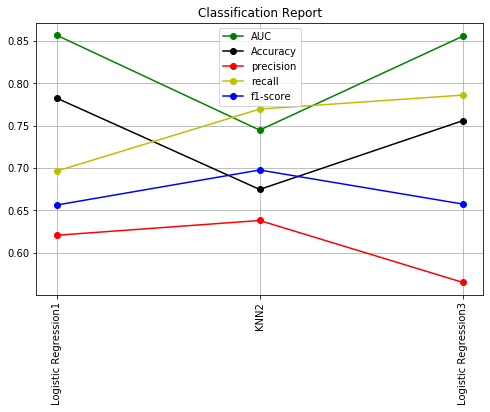

In [88]:
plt.figure(figsize=(8,5))
plt.plot(report4['Model'], report4['AUC'],'g-o',label='AUC')
plt.plot(report4['Model'], report4['Accuracy'],'k-o',label='Accuracy')
plt.plot(report4['Model'], report4['precision'],'r-o',label='precision')
plt.plot(report4['Model'], report4['recall'],'y-o',label='recall')
plt.plot(report4['Model'], report4['f1-score'],'b-o',label='f1-score')
plt.xticks(rotation=90);plt.title('Classification Report')
plt.grid(True)
plt.legend()
plt.show()

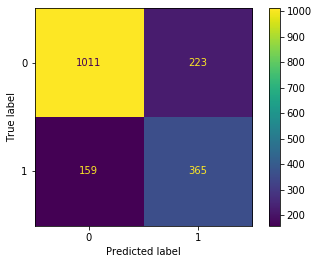

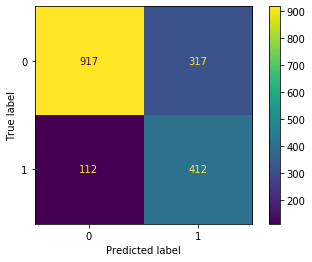

In [92]:
plot_confusion_matrix(lr1_tune,test_X1,test_Y1,values_format='0.0f')
plot_confusion_matrix(lr3_tune,test_X3,test_Y3,values_format='0.0f')

- Model Logistic Regression 1 dan Logistic Regression 3 memiliki score yang hampir sama, tapi Logistic Regression 3 memiliki score __Recall(1)/Sensitivity__ lebih besar dari Logistic Regression 1, ini berarti Logistic Regression memiliki probability False Negatif lebih rendah dan probability True Positif lebih tinggi seperti ditunjukan pada tabel confusion matrix di atas.
- Saya memilih model Logistic Regression 3, yaitu model yang kita train dengan data balance over sample sebagai model terbaik.

## Cek for OverFitting/UnderFitting

__Model 1__

In [149]:
def fitting(lr1_tune,rf1_tune,knn1_tune,train_X1,train_Y1,test_X1,test_Y1):
    print('Logistic Regression Training\n',classification_report(train_Y1,lr1_tune.predict(train_X1)))
    print('Logistic Regression Testing\n',classification_report(test_Y1,lr1_tune.predict(test_X1)))
    print('===============================================================================')
    print('\n\nRandom Forest Training\n',classification_report(train_Y1,rf1_tune.predict(train_X1)))
    print('\n\nRandom Forest Testing\n',classification_report(test_Y1,rf1_tune.predict(test_X1)))
    print('===============================================================================')
    print('\n\nKNN Training\n',classification_report(train_Y1,knn1_tune.predict(train_X1)))
    print('\n\nKNN Testing\n',classification_report(test_Y1,knn1_tune.predict(test_X1)))
fitting(lr1_tune,rf1_tune,knn1_tune,train_X1,train_Y1,test_X1,test_Y1)

Logistic Regression Training
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      3929
           1       0.55      0.72      0.63      1345

    accuracy                           0.78      5274
   macro avg       0.72      0.76      0.73      5274
weighted avg       0.81      0.78      0.79      5274

Logistic Regression Testing
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1234
           1       0.62      0.70      0.66       524

    accuracy                           0.78      1758
   macro avg       0.74      0.76      0.75      1758
weighted avg       0.79      0.78      0.79      1758



Random Forest Training
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      3929
           1       0.91      1.00      0.95      1345

    accuracy                           0.97      5274
   macro avg       0.95      0.98      0.97

__Model 2__

In [150]:
fitting(lr2_tune,rf2_tune,knn2_tune,train_X2,train_Y2,test_X2,test_Y2)

Logistic Regression Training
               precision    recall  f1-score   support

           0       0.72      0.54      0.62      1390
           1       0.64      0.80      0.71      1413

    accuracy                           0.67      2803
   macro avg       0.68      0.67      0.66      2803
weighted avg       0.68      0.67      0.66      2803

Logistic Regression Testing
               precision    recall  f1-score   support

           0       0.74      0.54      0.63       479
           1       0.62      0.80      0.70       456

    accuracy                           0.67       935
   macro avg       0.68      0.67      0.66       935
weighted avg       0.68      0.67      0.66       935



Random Forest Training
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1390
           1       0.97      0.96      0.96      1413

    accuracy                           0.96      2803
   macro avg       0.96      0.96      0.96

__Model 3__

In [151]:
fitting(lr3_tune,rf3_tune,knn3_tune,train_X3,train_Y3,test_X3,test_Y3)

Logistic Regression Training
               precision    recall  f1-score   support

           0       0.78      0.73      0.76      3929
           1       0.75      0.80      0.77      3929

    accuracy                           0.76      7858
   macro avg       0.77      0.76      0.76      7858
weighted avg       0.77      0.76      0.76      7858

Logistic Regression Testing
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1234
           1       0.57      0.79      0.66       524

    accuracy                           0.76      1758
   macro avg       0.73      0.76      0.73      1758
weighted avg       0.79      0.76      0.76      1758



Random Forest Training
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3929
           1       0.98      0.99      0.98      3929

    accuracy                           0.98      7858
   macro avg       0.98      0.98      0.98

- Berdasar report di atas, model Random Forest dan KNN over fitting, model tersebut mampu mengklasifikasi dengan sangat baik menggunakan data train tapi saat menggunakan data test model menunjukan peforma buruk.
- Model Logistic Regression tidak over fitting ataupun under fitting

# Save Model

In [97]:
import joblib

In [98]:
joblib.dump(lr3_tune,'lr_best_model')

['lr_best_model']